# Plot Blank Surprise

We load the Blank Surprise and plot it

Needs:
- Blanksurprise.pckl

`%matplotlib` prevents importing * from pylab and numpy
/home/matias/miniconda/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


Populating the interactive namespace from numpy and matplotlib


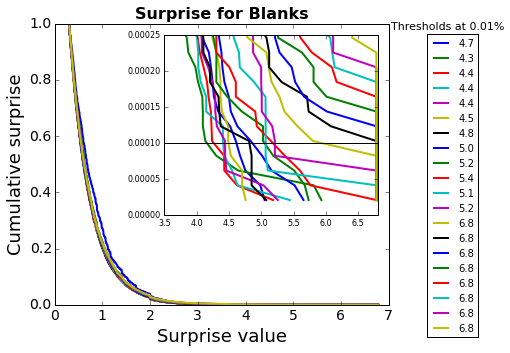

In [17]:
%pylab inline

#-------------------------------
# Path for loading and saving
Folder = '/home/matias/WORKSPACE/S2_git/data'    
#PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/BlankSurpriseAll'
PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/BlankSurprise'

#-------------------------------
#-------------------------------
import sys
sys.path.append('../functions') #this is where we put all the functions.py

from matplotlib.pyplot import *
import matplotlib.gridspec as gridspec
from numpy import *

import save_load as SL
#-------------------------------
#-------------------------------

#data = Folder + '/BlanksurpriseAll'
data = Folder + '/Blanksurprise'
a = SL.load_obj(data)
AllSurp = a.surp_data

#-------------------------------
#-------------------------------
# Define figure and axes

fig = figure(figsize = (8,5))

gs1 = gridspec.GridSpec(1, 6)
ax = fig.add_subplot(gs1[0:4])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.29, 0.39, 0.37, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])
#-------------------------------
#-------------------------------
# Plot the 20 binsizes Surprises

for i in arange(20):
    sorted_datab = np.sort(AllSurp[i])  
    yvalsb=np.arange(len(sorted_datab))/float(len(sorted_datab))
    leg = where(1-yvalsb<0.0001)[0][0]
    val = round(sorted_datab[leg],1)
    #print(val, len(sorted_datab), leg)
    ax.plot( sorted_datab, 1-yvalsb,lw=2 , label =str(val))
    ax2.plot( sorted_datab, 1-yvalsb,lw=2 )
    
ax.legend(bbox_to_anchor=(1.1, 0.98),loc=2,fontsize = 10)
#ax.text(9.05,0.98,'Thresholds at 0.05%', size=11)
ax.text(7.05,0.98,'Thresholds at 0.01%', size=11)

#-------------------------------
#-------------------------------
# titles, labels, ticks, limits
ax.set_xlabel('Surprise value',size = 18)
ax.set_ylabel('Cumulative surprise',size = 18)
ax.tick_params( labelsize=14)
ax2.tick_params( labelsize=8)

ax2.plot([3.5,6.8],[0.0001,0.0001], linewidth = 1)

#ax.set_title('Surprise for Blanks All',fontweight='bold', size = 16)
ax.set_title('Surprise for Blanks',fontweight='bold', size = 16)

ylim([0,0.00025])
xlim([3.5,6.8])

#-------------------------------
#-------------------------------
# Save pdf
fig.tight_layout() 

fig.savefig(PDFfile +'.pdf', format='pdf')  